In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [5]:
#pick random sample
df.sample()

,YearsExperience,Salary
6,3.0,60150.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [7]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [8]:
#checking null values. Always return in boolean
df.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [9]:
#count of missing/null values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
df['YearsExperience'].describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64

In [12]:
print(df['YearsExperience'].mean())
print(df['YearsExperience'].max())

5.3133333333333335
10.5


In [13]:
df.YearsExperience.describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64

In [14]:
import matplotlib.pyplot as plt

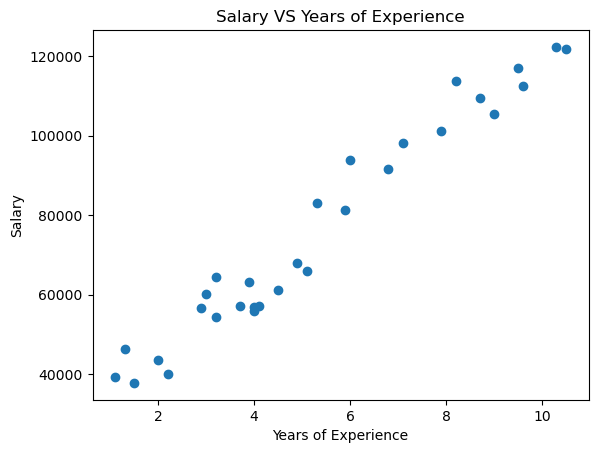

In [15]:
plt.scatter(x=df['YearsExperience'],y=df['Salary'])
plt.title("Salary VS Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

# Seperating Data into Input and Output Column (Independent and Dependent Variable)

In [16]:
#independent variable
X = df.drop(columns=['Salary'])

In [17]:
#dependent variable
y = df['Salary']

In [18]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [19]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

# Splitting Data into Training and Testing

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [22]:
x_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7


# Creating Model

In [23]:
#model import
from sklearn.linear_model import LinearRegression

In [24]:
model=LinearRegression()

In [25]:
model.fit(x_train, y_train)

LinearRegression()

# Making an equation by taking out model intercept and slop 

In [26]:
print(model.intercept_)
print(model.coef_)
print('y= ', model.coef_, '* X', '+', model.intercept_)

26780.099150628186
[9312.57512673]
y=  [9312.57512673] * X + 26780.099150628186


In [27]:
print(model.coef_ *1.1 + model.intercept_)

[37023.93179003]


# Testing Model

In [55]:
#model prediction
model.predict([[20]])

C:\Users\MAK TECH\Anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([213031.60168521])

In [35]:
#predict

y_pred = model.predict(x_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [42]:
pd.DataFrame({'y_test':y_test, 'y_pred':y_pred, 'MAE':y_test-y_pred})

,y_test,y_pred,MAE
2,37731.0,40748.961841,-3017.961841
28,122391.0,122699.622956,-308.622956
13,57081.0,64961.657170,-7880.657170
10,63218.0,63099.142145,118.857855
26,116969.0,115249.562855,1719.437145
24,109431.0,107799.502753,1631.497247


# Evaluation Matrix

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
print('MSE= ', mean_squared_error(y_test, y_predict))
print('RMSE= ', np.sqrt(mean_squared_error(y_test, y_predict)))
print('R2 =', r2_score(y_test, y_predict))

MSE=  12823412.298126562
RMSE=  3580.979237321345
R2 = 0.988169515729126


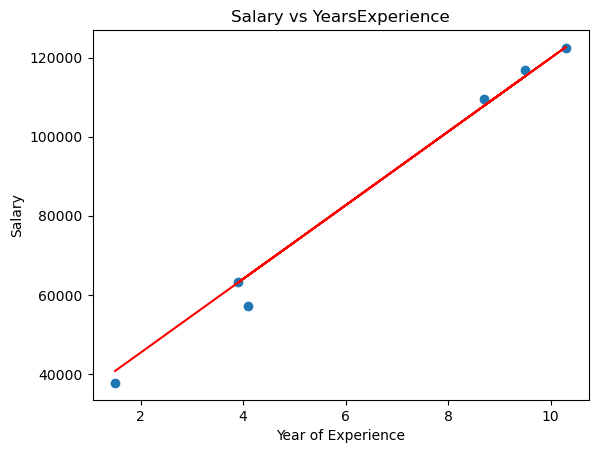

In [57]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')
plt.title("Salary vs YearsExperience")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.show()

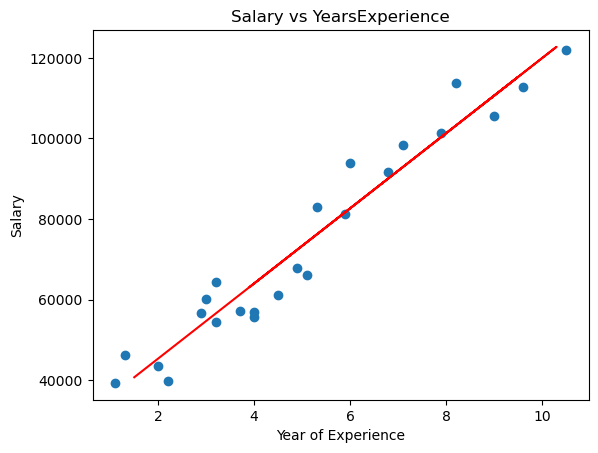

In [56]:
plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred, color='r')
plt.title("Salary vs YearsExperience")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.show()